<h1>Analysis on Insurance Costs of U.S. Adults</h1>

The dataset of the insurance costs of U.S. adults is composed of 7 columns, with 6 independent variables (<b>age, sex, bmi, child, smoker, region</b>) and 1 outcome variable (<b>charges</b>). In prior to the profound analysis of the relationship between these variables, I will briefly summarize an important detail of this dataset.


In this dataset, the <b>median</b> insurance charge is approximately <b>9382.03</b>, and the <b>mean</b> insurance charge is approximately  <b>13270.42</b>, which is <b>41.44%</b> higher than the former. Looking at the histogram, we can clearly see that the distribution is <i>skewed to the right</i>. In order to account for the skewedness of the distribution, I will <b>use median instead of mean</b> to evaluate the center of certain distributions when analyzing the relationships between different variables.

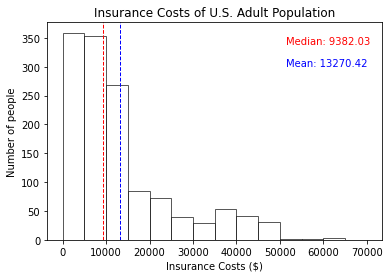

<Figure size 432x288 with 0 Axes>

In [98]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt

insurances = pd.read_csv('insurance.csv')

plt.hist(insurances.charges, range=(0, 70000), bins=14, edgecolor='k', alpha=0.65, color='white')
plt.title('Insurance Costs of U.S. Adult Population')
plt.xlabel('Insurance Costs ($)')
plt.ylabel('Number of people')

plt.axvline(charges_mean, color='b', linestyle='dashed', linewidth=1)
plt.axvline(charges_median, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(max_xlim*0.7, max_ylim * 0.8, f'Mean: {round(insurances.charges.mean(), 2)}', color='b')
plt.text(max_xlim*0.7, max_ylim * 0.9, f'Median: {round(insurances.charges.median(),2)}', color='r')

plt.show()
plt.clf()


<h3>Part 1: Determine the strongest and the weakest contributing factor to the insurance charges</h3>

In [99]:
# Function that changes the region into an integer
def region_index(x):
	if x == 'southwest':
		return 1
	elif x == 'southeast':
		return 2
	elif x == 'northwest':
		return 3
	else:
		return 4

# Converting the qualitative values into quantitative values for easier computation
insurances['sex'] = insurances.sex.apply(lambda x: 1 if x =="male" else 2)
insurances['smoker'] = insurances.smoker.apply(lambda x: 1 if x =='yes' else 0)
insurances['region'] = insurances.region.apply(lambda x: region_index(x))

#Calculating the correlation coefficient of each variable with the insurance charges
age_charges = insurances['age'].corr(insurances['charges'])
sex_charges = insurances['sex'].corr(insurances['charges'])
bmi_charges = insurances['bmi'].corr(insurances['charges'])
child_charges = insurances['children'].corr(insurances['charges'])
smoker_charges = insurances['smoker'].corr(insurances['charges'])
region_charges = insurances['region'].corr(insurances['charges'])

# Creating a table of variables against the correlation coefficients to easily compare the values
charges_corr_df = pd.DataFrame({'variables': ['age', 'sex', 'bmi', 'child', 'smoker', 'region'], 'corr_coeff': [age_charges, sex_charges, bmi_charges, child_charges, smoker_charges, region_charges]})
print(charges_corr_df)

  variables  corr_coeff
0       age    0.299008
1       sex   -0.057292
2       bmi    0.198341
3     child    0.067998
4    smoker    0.787251
5    region    0.006208


Looking at the table, we can see that the <b>"smoker"</b> variable has the strongest correlation with the insurance charges, and the <b>"region"</b> variable has the weakest (or almost no) correlation with the insurance charges. This contradicts my initial hypothesis that <b>"bmi"</b> would be the largest contributing factor to the insurance charges (<b>"bmi"</b> in fact had a low correlation coefficient value of less than <b>0.2</b>). 

Let us dig deeper into the relationship between <b>"smoker"</b> variable and the <b>"charges"</b> variable. The easiest way to find if there exists a linear relationship between these two variables is using the scatter plot to visually represent the relationship.



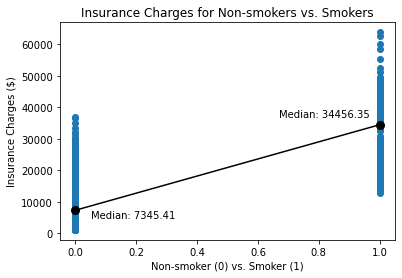

<Figure size 432x288 with 0 Axes>

In [162]:
charges_smoker = insurances.groupby('smoker').charges.median().reset_index()
smoker_median = charges_smoker.iloc[1,1]
non_smoker_median = charges_smoker.iloc[0,1]
plt.scatter(insurances['smoker'], insurances['charges'])
plt.xlabel('Non-smoker (0) vs. Smoker (1)')
plt.ylabel('Insurance Charges ($)')
plt.title('Insurance Charges for Non-smokers vs. Smokers')
plt.plot([0,1], [non_smoker_median, smoker_median], color='k')
plt.plot(0, non_smoker_median, marker='o', color='k',markersize=8)
plt.plot(1, smoker_median, marker='o', color='k',markersize=8)
plt.text(0.05, 5000, f'Median: {round(non_smoker_median, 2)}', color='k')
plt.text(0.67, 37000, f'Median: {round(smoker_median, 2)}', color='k')
plt.show()
plt.clf()

As can be seen in the graph, the median insurance charges of the non-smokers is approximately 7345.41, whereas the median insurance charges for a smoker is approximately 34456.35, which is 469.70% higher than the former. This outstanding difference in these two groups indicate that the <i>"smoker" variable does indeed have a huge impact on the insurance charges of an individual, and one's smoking habit could hugely increase his or her insurance costs</i>.


<h3> Part 2: Determine how the smoking habits in each sex affect the insurance charges </h3>

As concluded in Part 1, <i>smoking seems to be a highly expensive habit in relation to insurance charges. </i> Now, we will divide the participants into four groups, according to their sex and smoking habit, and inspect how the insurance charges across different groups differ.

In [145]:
# Grouping based on the variables "smoker" and "sex"
smokers_sex = insurances.groupby(['smoker', 'sex']).charges.median().reset_index()
smokers_sex['sex'] = smokers_sex['sex'].apply(lambda x: 'male' if x ==1 else 'female')
smokers_sex_pivot = smokers_sex.pivot(columns='smoker', index='sex', values='charges')
smokers_sex_pivot.index.name = None
smokers_sex_pivot.rename(columns={0: 'non-smoker', 'smoker': 'sex',1:'smoker'}, inplace=True)

print(smokers_sex_pivot)

smoker  non-smoker      smoker
female  7639.41745  28950.4692
male    6985.50695  36085.2190


The median insurance charges of <b>female non-smokers</b> is <b>7639.42</b> and that of <b>female smokers</b> is <b>28950.50</b>; the median insurance charges of <b>male non-smokers</b> is <b>6985.51</b> and that of <b>male smokers</b> is <b>36085.22</b>. Interestingly enough, smoking habit among the male participants incurred in <b>29099.71</b> increase in insurance charges, which is <b>37%</b> higher than the increase in the insurance charges incurred by the smoking habit of female participants, which is <b>21311.08</b>. In other words, "smoker" variable affected the insurance charges of the "male" participants <i>37% more</i> than it did to the insurance charges of the "female" participants. This is vindicated by the higher correlation coefficient between "smoker" and "charge" among "male" participants than in "female" participants.

In [116]:
# Grouping based on sex
males = insurances[insurances['sex'] == 1]
females = insurances[insurances['sex'] == 2]
male_corr = males['smoker'].corr(males['charges'])
female_corr = females['smoker'].corr(females['charges'])
m_f_corr = pd.DataFrame({'sex': ['male', 'female'], 'corr_smoker_charges': [male_corr, female_corr]})
print(m_f_corr)

      sex  corr_smoker_charges
0    male             0.816579
1  female             0.746695


<h3>Part 3: Determine how the insurance charges differ across the age groups.</h3>

Let us begin by grouping the participants into different age groups, with an interval of 10 years for each bin.

In [117]:
my_bins=[10, 19, 29, 39, 49,59, 69]
my_labels = ['10s', '20s', '30s', '40s', '50s', '60s']
insurances['age_group'] = pd.cut(insurances['age'], bins=my_bins, labels=my_labels)
age_group_charges_median = insurances.groupby('age_group').charges.median().reset_index()
age_group_charges_median.rename(columns={'charges': 'median_charges'},inplace=True)
age_group_charges_diff = insurances.groupby('age_group').charges.apply(lambda x: x.max() - x.min()).reset_index()
age_group_charges_diff.rename(columns={'charges': 'max_min_diff'}, inplace=True)
age_group_charges = pd.merge(age_group_charges_median, age_group_charges_diff)
print(age_group_charges)

  age_group  median_charges  max_min_diff
0       10s     2138.070700   38600.87230
1       20s     3560.254575   49803.03044
2       30s     6082.405000   55310.87548
3       40s     8606.217400   57177.21189
4       50s    11729.679500   55327.76101
5       60s    14255.400500   40448.25079


The median of the insurance charges of different age groups increases as the age group moves from a younger group to an older group. The biggest difference between max and min insurance charges exists in the '40s' age group (57177.21), which is 48.27% higher than that of the '10s' age group (38600.87). I suspect that this is due to the different proportion of smokers in each age group, and will further extend my research whether their exists a linear relationship between each age group's difference in maximum and minimum insurance charges and the proportion of smokers.

  age_group  smoker_proportion  median_charges  max_min_diff
0       10s               0.22     2138.070700   38600.87230
1       20s               0.20     3560.254575   49803.03044
2       30s               0.23     6082.405000   55310.87548
3       40s               0.22     8606.217400   57177.21189
4       50s               0.15    11729.679500   55327.76101
5       60s               0.24    14255.400500   40448.25079
Correlation coefficient of 'smoker_proportion' in relation to 'max_min_diff': -0.4140084763867217


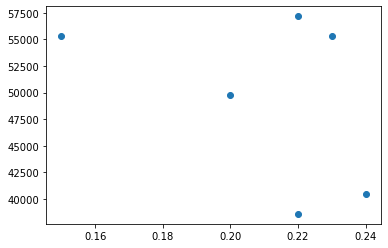

In [169]:
age_group_smokers = insurances.groupby(['age_group', 'smoker']).charges.count().reset_index()
age_group_smokers_pivot = age_group_smokers.pivot(columns='smoker', index='age_group', values='charges').reset_index()
age_group_smokers_pivot.index.name = None
age_group_smokers_pivot.rename(columns={0: 'non_smoker', 1:'smoker'}, inplace=True)
age_group_smokers_pivot['smoker_proportion'] = round(age_group_smokers_pivot['smoker'] / (age_group_smokers_pivot['non_smoker'] + age_group_smokers_pivot['smoker']), 2)
age_group_smokers_pivot = pd.merge(age_group_smokers_pivot[['age_group', 'smoker_proportion']], age_group_charges)
print(age_group_smokers_pivot)
plt.scatter(age_group_smokers_pivot['smoker_proportion'], age_group_smokers_pivot['max_min_diff'])
print("Correlation coefficient of 'smoker_proportion' in relation to 'max_min_diff': " + str(age_group_smokers_pivot['smoker_proportion'].corr(age_group_smokers_pivot['max_min_diff'])))
      


According to a table, the "smoker_proportion" in each age group seems to be very similar across all ages, only with the '50s' age group having an exceptionally low smoker proportion. Since we can't clearly identify the linearity of the relationship between the two variables from the table, we take a look into the correlation coefficient between them, which was calculated to be about -0.41. This value indicates that there exists a negative correlation between the two variables, 'smoker_proportion' and 'max_min_diff'; in other words, as the ratio of smokers increases within an age group the difference between maximum and minimum insurance charges become bigger in each age group to a moderate degree, with the correlation coefficient equal to -0.41. 